# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

иначе каждый раз будут разные результаты и при запуске кода студентом и проверяющим (например) результаты не сойдутся

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [58]:
import pandas as pd

In [59]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [60]:
# Ваш код здесь
df_train.sample(30)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [61]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [62]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [63]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [64]:
[col for col in df_train.columns if df_train[col].isnull().any()]
#колонки с пустыми

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [65]:
[col for col in df_test.columns if df_test[col].isnull().any()]

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [66]:
# табличка чтобы еще раз проверить NaN/spaces - там , где число объектов меньше максимального
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [67]:
df_train.duplicated().sum() # 1/7 строк - повторения

np.int64(985)

In [68]:
df_test.duplicated().sum()

np.int64(62)

- 1 при просмотре сэмпла, первых 5 и нижних 5 строк мы можем заметить, что например пробег в разных единицах измереения, количество сидений дробное, могут быть сложности при построении модели - это все надо нормализовать ( нужна предобработка )Пока что не видела никаких выбросов / аномалий. Пока что не видела различий между семпом тренировочных данных и хед/тейл тестовых

- 2 Проверки duplicated() не достаточно тк она выдает только абсолютно идентичные по всем показателям строчки, частично отличающиеся не выдаст ( хотя у нас уже 1/7 данных - это дубликаты, то есть вероятность переобучения модели, или скьюнес куда-нибудь если их не убрать)
Для того, чтобы увидеть все дубликаты на самом деле надо еще сделать:
  - Проверку по ключевым признакам
  - Проверку по частичным совпадениям
  -  Проверку распределений значений
  -  Проверку выбросов, которые могут быть дублями

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [69]:
#df_train.median() #TypeError: Cannot convert у нас есть колонки - категории, даже там где расход топлива есть размерность то есть это тоэе категориальная колонка  не числовая

In [70]:
# your code here
num_cols = df_train.select_dtypes(include=[np.number]).columns # np.int_ : np.int32 np.int64 np.float_np.float32 np.float64
median_values = df_train[num_cols].median()

df_train[num_cols] = df_train[num_cols].fillna(median_values)
df_test[num_cols] = df_test[num_cols].fillna(median_values)

print(df_train.isnull().sum()[df_train.isnull().sum() > 0])
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])

print(median_values)


mileage      202
engine       202
max_power    196
torque       203
dtype: int64
mileage      19
engine       19
max_power    19
torque       19
dtype: int64
year               2015.0
selling_price    450000.0
km_driven         60000.0
seats                 5.0
dtype: float64


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [71]:
# your code here
target_col = "selling_price" # y_train из степика (потому что это единственный не экзогенный признак, по логике - оно)
X_train = df_train.drop(columns=[target_col]) # X_train from Stepik :) тут датасет
feature_cols = df_train.columns.drop(target_col) # почти тоже чамое, но каждая колонка отдельно как бы
y_train = df_train[target_col]

# check print(X_train.shape)
# check print(y_train.shape)

X_test = df_test.drop(columns=[target_col]) # пока этто не нужно, но пусть все булет в одном месте
y_test = df_test[target_col]

mask_dupes = df_train.duplicated(subset=feature_cols, keep=False)
dupes = df_train[mask_dupes]
#print(dupes.shape) оно для меня - проверить  что все консистент и лишнее не отвалилось
print(len(dupes))




display(dupes.head(20))

1799


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
31,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
32,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
33,Hyundai Verna VTVT 1.6 SX Option,2019,1149000,5000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1591 CC,121.3 bhp,151Nm@ 4850rpm,5.0
35,Tata Safari DICOR 2.2 LX 4x2,2011,425000,60000,Diesel,Individual,Manual,Second Owner,13.93 kmpl,2179 CC,138.03 bhp,320Nm@ 1700-2700rpm,7.0
36,Maruti 800 Std,2012,150000,76000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


In [72]:
# получилось 1798 дубликатов - данные очень грязные
df_train = df_train.drop_duplicates(subset=feature_cols, keep="first") # pandas.DataFrame.drop_duplicates DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False) https://github.com/pandas-dev/pandas/blob/v2.3.3/pandas/core/frame.py#L6753-L6848
df_train = df_train.reset_index(drop=True)
print(df_train.shape)


(5840, 13)


In [73]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [74]:
# your code here
# torque состоит из ньютоновского крутящего момента и далее диапозона - мы могли разобрать строку на три составляющих и разбить как text to columns в экселе
import re

def extract_number(x):
    if pd.isna(x):
        return np.nan
    match = re.search(r"(\d+\.?\d*)", str(x))
    if match:
        return float(match.group(1)) #сверху было поход по столбцу преобразование его в строку и поиск в строке (для группы 1) числа целого или дробного для группы 2 остаток
        #теперь мы берем (ввозвращаем) только 1 группу то есть только число
    return np.nan


df_train["mileage"] = df_train["mileage"].apply(extract_number)
df_train["engine"] = df_train["engine"].apply(extract_number)
df_train["max_power"] = df_train["max_power"].apply(extract_number)

df_train["mileage"] = df_train["mileage"].astype("float64")
df_train["engine"] = df_train["engine"].astype("float64")
df_train["max_power"] = df_train["max_power"].astype("float64")

if "torque" in df_train.columns:
    df_train.drop(columns=["torque"], inplace=True)

num_cols = df_train.select_dtypes(include=["number"]).columns
df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())


df_train.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


In [75]:
df_test["mileage"] = df_test["mileage"].apply(extract_number)
df_test["engine"] = df_test["engine"].apply(extract_number)
df_test["max_power"] = df_test["max_power"].apply(extract_number)

df_test["mileage"] = df_test["mileage"].astype("float64")
df_test["engine"] = df_test["engine"].astype("float64")
df_test["max_power"] = df_test["max_power"].astype("float64")

if "torque" in df_test.columns:
    df_test.drop(columns=["torque"], inplace=True)

num_cols = df_test.select_dtypes(include=["number"]).columns
df_test[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())


df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Tata Nexon 1.5 Revotorq XE,2014,370000,120000,Diesel,Individual,Manual,First Owner,21.14,1498.0,103.52,5.0
2,Honda Civic 1.8 S AT,2010,225000,127000,Petrol,Individual,Automatic,First Owner,23.00,1396.0,90.00,5.0
3,Honda City i DTEC VX,2007,130000,120000,Diesel,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2017,440000,45000,Petrol,Individual,Manual,Second Owner,20.14,1197.0,81.86,5.0


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [76]:
# your code here
datasets = [df_train, df_test]

for df in datasets:
    df["engine"] = df["engine"].fillna(df["engine"].median())
    df["seats"]  = df["seats"].fillna(df["seats"].median())

for df in datasets:
    df["engine"] = df["engine"].astype(int)
    df["seats"] = df["seats"].astype(int)


In [77]:
''' так проще и визуальнее несмотря на тройную затрату памяти ( видимо, я без бонусных баллов :)))
я заменила пропуски медианным значением чтобы было консистентно с предыдущими заданиями
df_train["engine"] = df_train["engine"].fillna(df_train["engine"].median())
df_train["seats"]  = df_train["seats"].fillna(df_train["seats"].median())

df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"] = df_train["seats"].astype(int)'''

df_train.head()

# milage and max power все еще флоат

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [78]:
'''df_test["engine"] = df_test["engine"].fillna(df_test["engine"].median())
df_test["seats"]  = df_test["seats"].fillna(df_test["seats"].median())

df_test["engine"] = df_test["engine"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)'''

df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Tata Nexon 1.5 Revotorq XE,2014,370000,120000,Diesel,Individual,Manual,First Owner,21.14,1498,103.52,5
2,Honda Civic 1.8 S AT,2010,225000,127000,Petrol,Individual,Automatic,First Owner,23.00,1396,90.00,5
3,Honda City i DTEC VX,2007,130000,120000,Diesel,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2017,440000,45000,Petrol,Individual,Manual,Second Owner,20.14,1197,81.86,5


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [79]:
# your code here
numeric_cols = df_train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns

df_train.shape


(5840, 12)

In [80]:
print( list(numeric_cols))
print(list(categorical_cols))

display(df_train[numeric_cols].describe())
display(df_test[numeric_cols].describe())

display(df_train[categorical_cols].describe(include=["object"]))
display(df_test[categorical_cols].describe(include=["object"]))

['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
['name', 'fuel', 'seller_type', 'transmission', 'owner']


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.484000,5.732370e+05,71470.857000,19.303840,1451.424000,88.484215,5.452000
std,4.091024,7.199366e+05,45971.343596,4.033975,521.624639,34.895198,0.990291
min,1983.000000,4.000000e+04,1000.000000,0.000000,624.000000,0.000000,4.000000
25%,2011.000000,2.500000e+05,36900.000000,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.000000e+05,68000.000000,19.315000,1248.000000,81.860000,5.000000
75%,2017.000000,6.462500e+05,100000.000000,22.000000,1498.000000,98.630000,5.000000
max,2020.000000,1.000000e+07,360003.000000,42.000000,2997.000000,400.000000,10.000000


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [81]:
#assert df_train.shape == (5840, 13)

### * в задании 3 мы удаляли крутящий моент (торкью) в заданиях выше*

 * у нас не может быть 13 колонок - либо должны были все преоброзования делать на копии, но тогда статистика бы слетела тк мы не смогли бы сравнить результаты категориальных и числовых столбцов После удаление торкью колонок должно было быть 12

 *  Количество строк осталось как есть - то есть при чистке пустых значений мы ничего не удалили

 * то есть там должно быть не (5840, 13)  а (5840, 12)






In [82]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

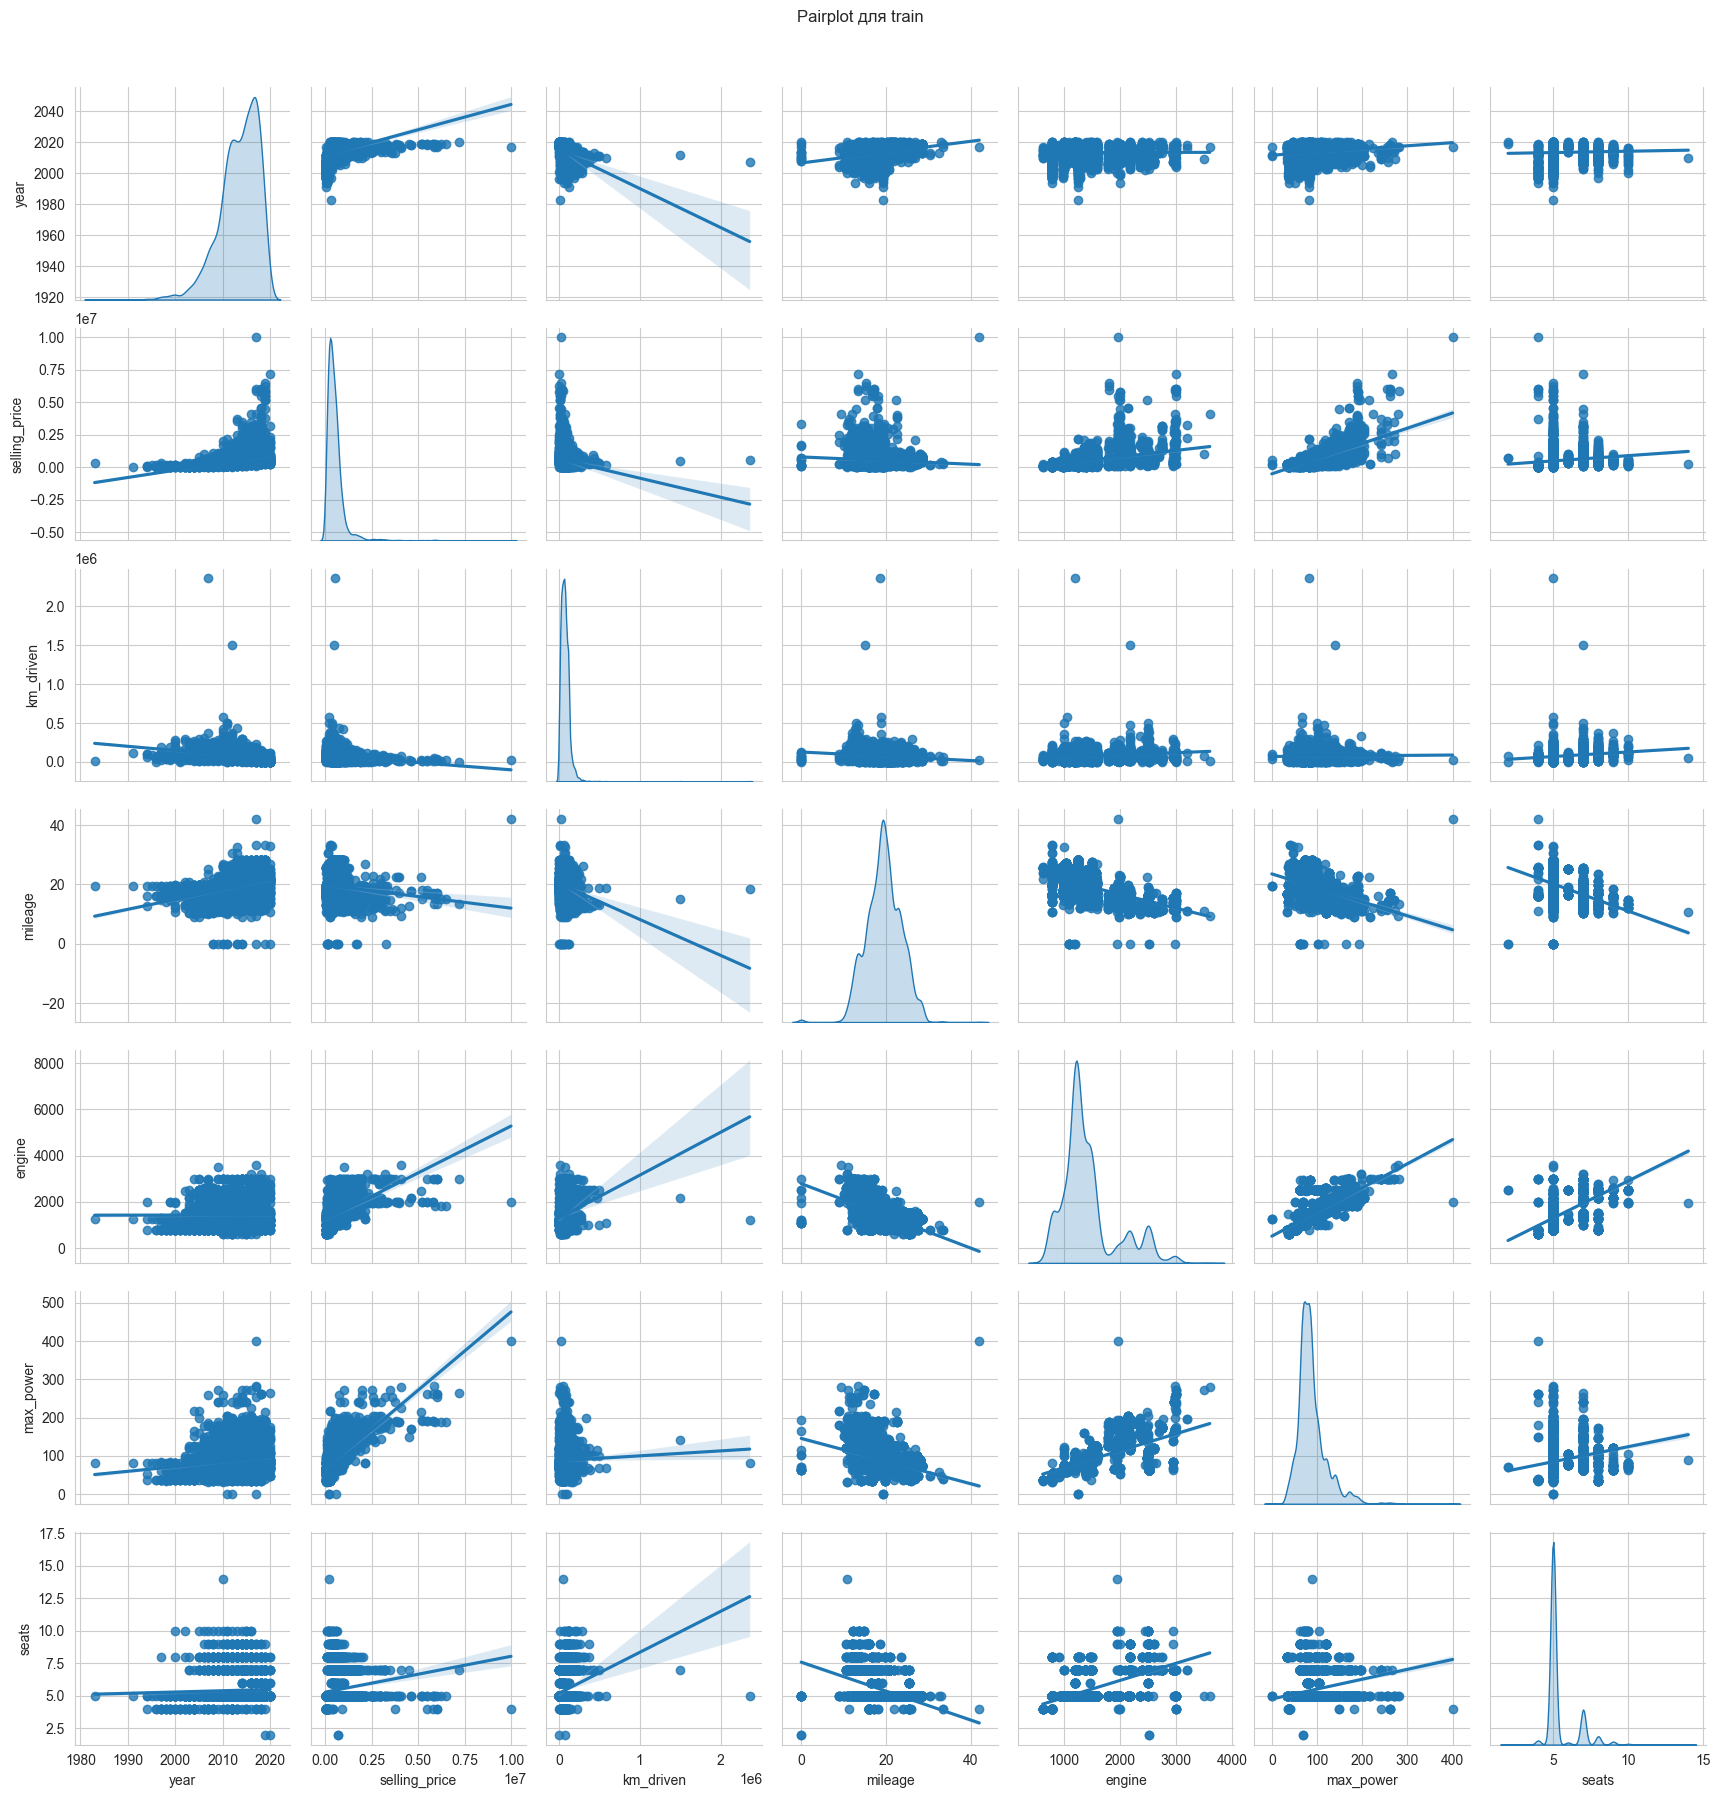

In [83]:
# your code here
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_train.select_dtypes(include=["number"]).columns.tolist()

sns.pairplot(df_train[numeric_cols], diag_kind="kde",kind="reg") # точки-данные,конус - MSE доверительный интервал, линия-тренд
plt.suptitle("Pairplot для train", y=1.03)
plt.show()



**selling_price**  
- есть зависимость/ тренд при связи стоимости машины и других показателей тренд для двигателя и макс паур положительный то есть чем мощнее машина - тем дороже при этом у цены и макс повер очень сильный резкий положительный тренд - то есть мощность машины влияет на цену больше всего остального
- позитивная корреляция с годом - чем машина новее, тем дороже
- для ситс не очень понятно - сначала резкий рост потом плавный спад


**другие взаимосвзяи**
- чем мощнее двигатель - тем больше лс - прямая корреляция энджин и макс повер
- гипотеза, что есть обратная корреляция возраста с пробегом не видна. В целом, пробег влияет только в начале ( думают , что это про то, что машина дешевеет как только ее вывозят из салона)
- не видна зависимость между расходом топлива и стоимостью машины
- современные машины чаще более экономичны ( обратная корреляция майледж и года)

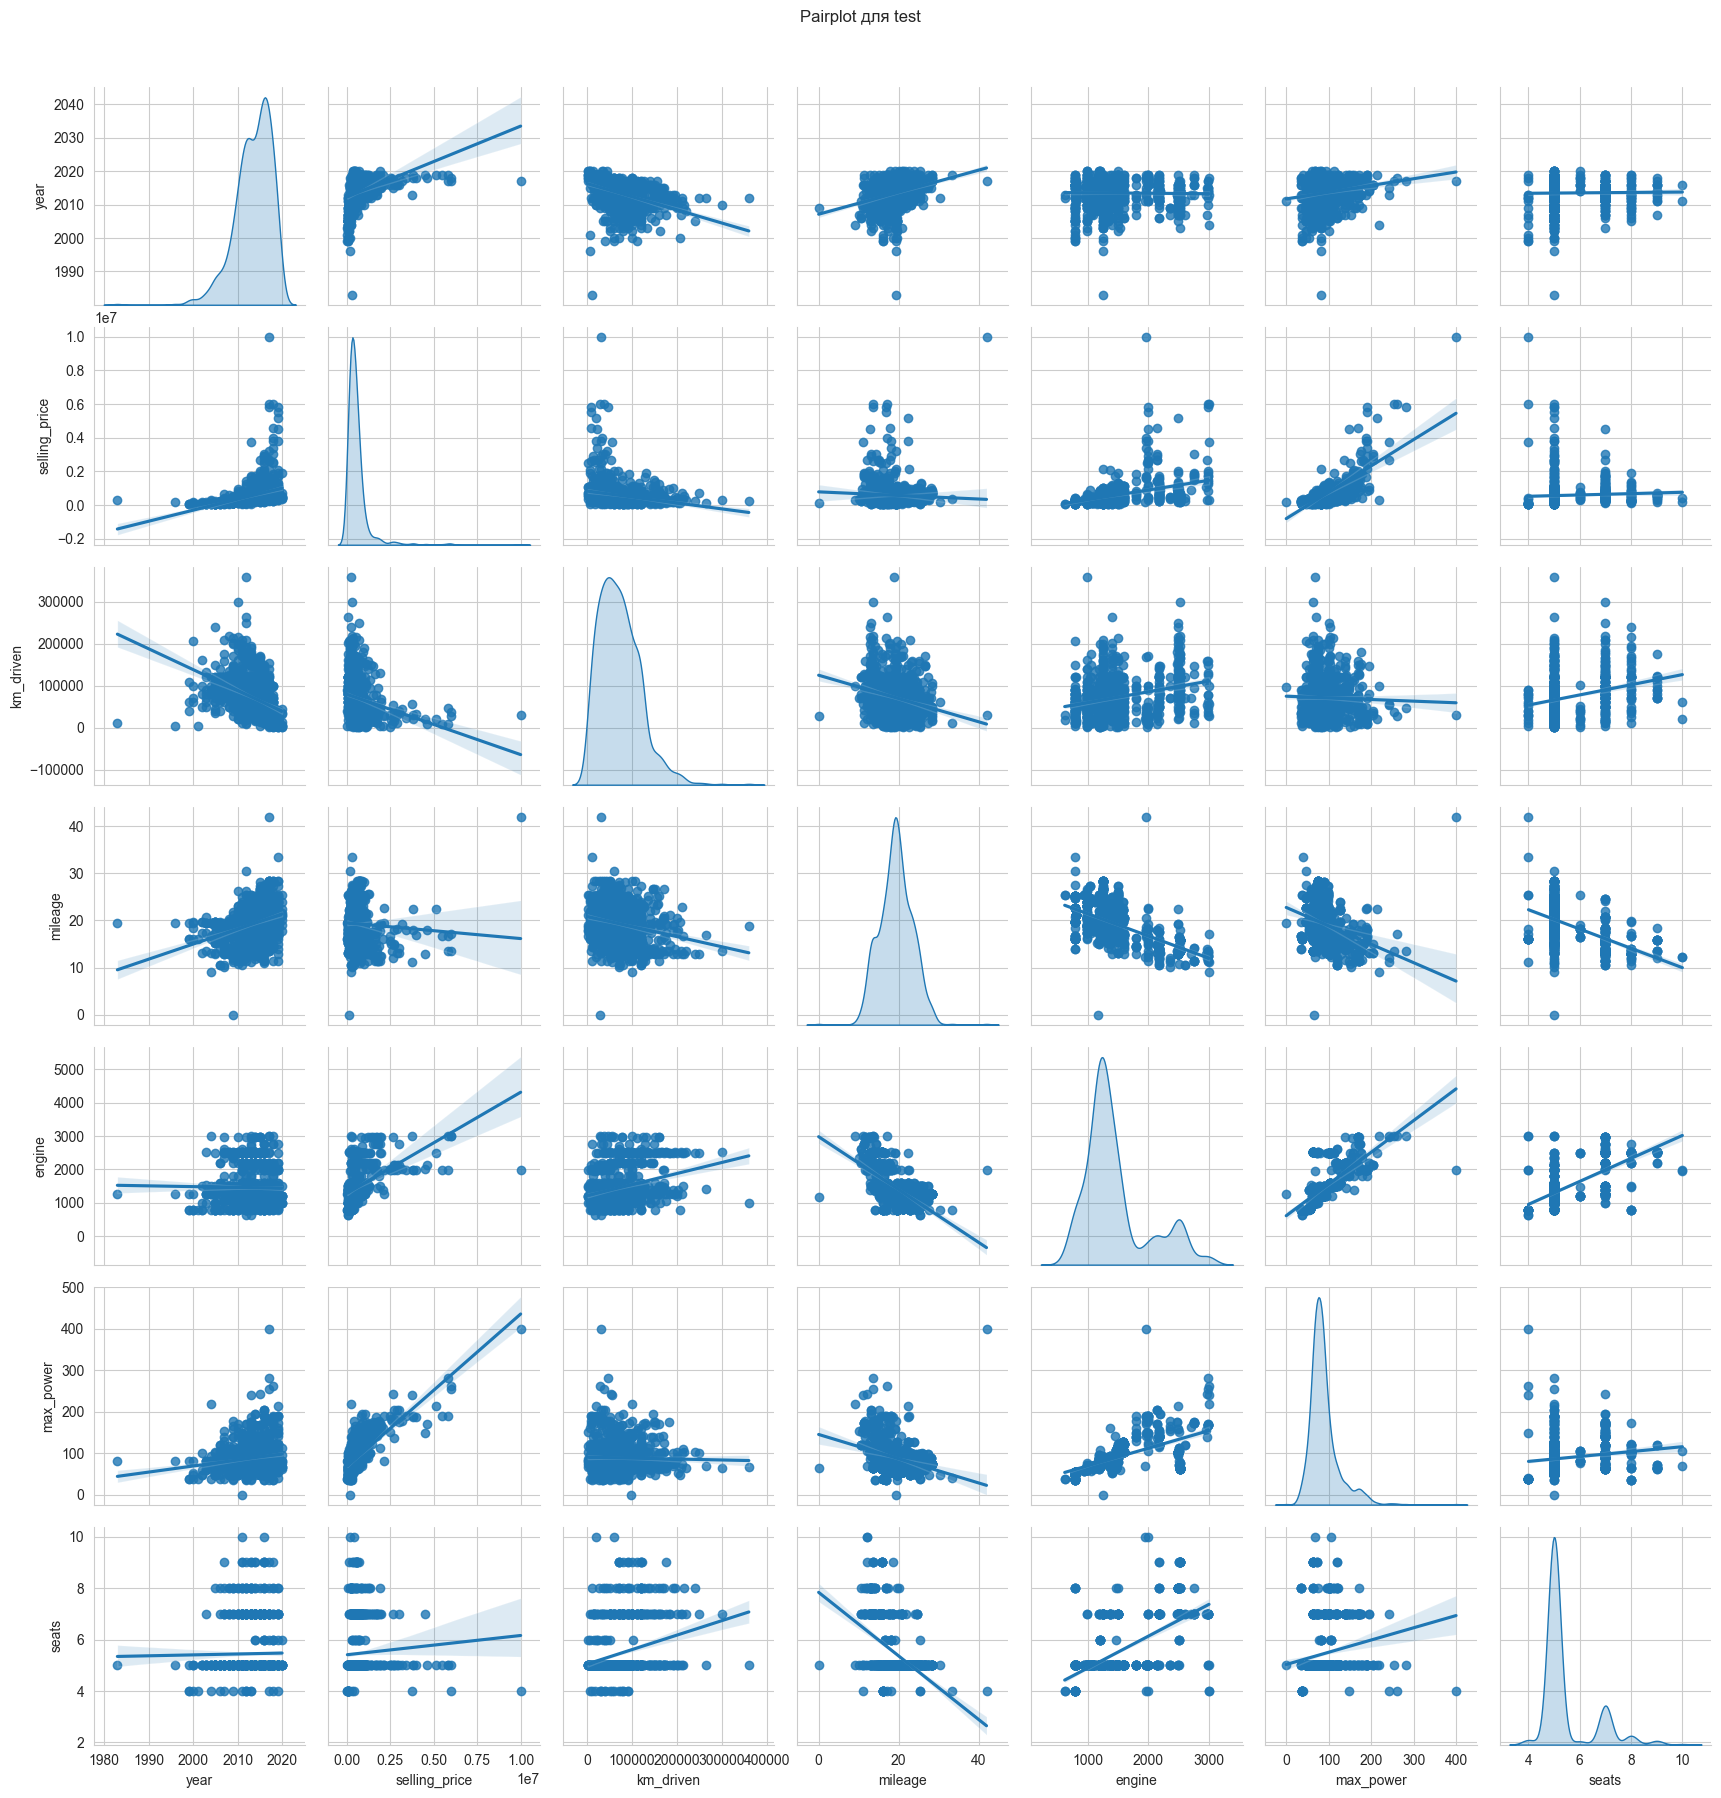

In [84]:
# your code here
sns.pairplot(df_test[numeric_cols], diag_kind="kde", kind = "reg")
plt.suptitle("Pairplot для test", y=1.03)
plt.show()

`Your answer here`
распределения похожи в Тестовых и Обучающих данных то есть выборки правильно сделали и не должно быть ошибок в сдвигах распределения

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [85]:
# your code here
corr_matrix = df_train[numeric_cols].corr(method="pearson")

corr_matrix

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.652172
max_power,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.244112
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,1.000000


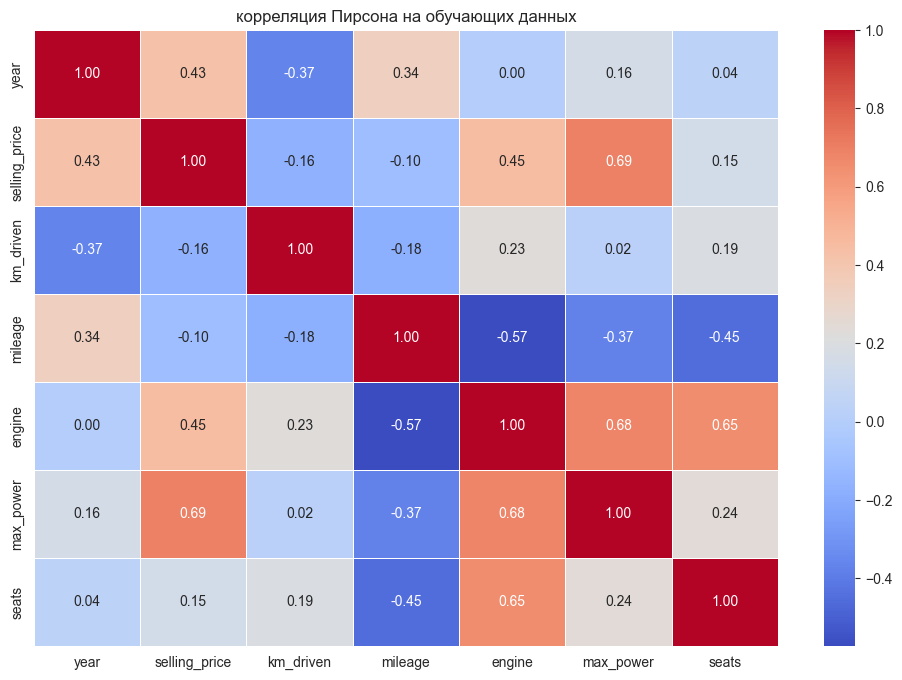

In [86]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True, #corr value inside boxes
    fmt=".2f", # digits posle .
    cmap="coolwarm", #paletka
    linewidths=0.5 #shvi (white liness inbetween)
)
plt.title("корреляция Пирсона на обучающих данных")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

нет корреляции между годом выпуска и мощностью
почти нет связи между макс повер и количеством километров пробега
крошечная корреляция между количеством сидений в машине и годом выпуска

видно то же что и на графиках сверху - макс сила и двигатель сильнее всего свзяаны с ценой ( самая большая положительная корреляция)

обратная корреляция мощности двигателя и расхода топлива - чем мощнее машина, тем большее ей нужно бензина - порш тратит больше жигули

обратная корреляция между количеством сидений и расходом топлива - жигули тартит меньше чем буханка

верно,опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи
хотя корреляция средней силы и это не всегда так

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

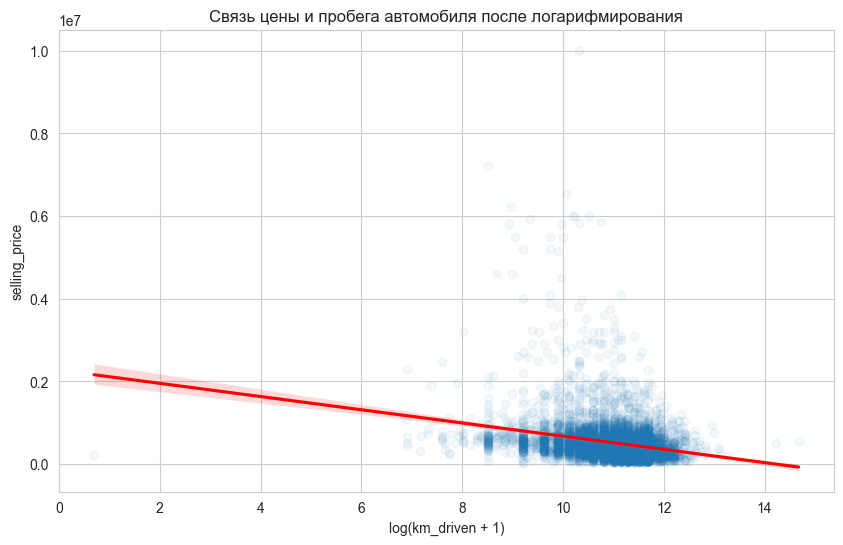

In [87]:
# your code here
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_train,
    x=np.log1p(df_train["km_driven"]), # стабилизация выбросов с помощью логарифмирования( из лекций TS курса)
    y="selling_price",
    scatter_kws={"alpha": 0.05}, # низка плотность кружочков - чтобы лучше видеть изменение плотности
    line_kws={"color": "red"}
)
plt.xlabel("log(km_driven + 1)")
plt.ylabel("selling_price")
plt.title("Связь цены и пробега автомобиля после логарифмирования")
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [88]:
# я это уже делала выше, но для грязных датасетов
target_col = "selling_price" # y_train из степика (потому что это единственный не экзогенный признак, по логике - оно)

df_train_for_numbers = df_train.copy()
df_test_for_numbers = df_test.copy()

df_train_num = df_train_for_numbers.select_dtypes(include=["number"])
df_test_num = df_test_for_numbers.select_dtypes(include=["number"])

df_train_num.head() #check



,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248,74.00,5
1,2014,370000,120000,21.14,1498,103.52,5
2,2010,225000,127000,23.00,1396,90.00,5
3,2007,130000,120000,16.10,1298,88.20,5
4,2017,440000,45000,20.14,1197,81.86,5


In [89]:
X_train = df_train_num.drop(columns=[target_col])
y_train = df_train_num[target_col]

X_test = df_test_num.drop(columns=[target_col])
y_test = df_test_num[target_col]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

X_train.head() #check


(5840, 6)
(5840,)
(1000, 6)
(1000,)


,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5


In [90]:
# опишите выбранные вещественные признаки
#year  год выпуска чем новее - тем дороже
#km_driven - пробег количество км проехала машина  сильно влияет на цену, потом нет
#mileage - расход топлива. низкая корреляция с ценой
#engine - объем двигателя  высокая корреляция с ценой
#max_power - лошадиные силы/ выходная мощность  высокая корреляция
#seats - количество сидений


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
# from lectures and Stepik

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

mse_train = MSE(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE на трейне: {mse_train}") # комментарий (мсе на трейне) сгенерирован встроенным джеменай
print(f"R2 на трейне: {r2_train}") # комментарий (р2 на трейне) сгенерирован встроенным джеменай

MSE на трейне: 116874153930.02817
R2 на трейне: 0.5922591702157329


In [92]:
y_pred_test = model.predict(X_test)

mse_test = MSE(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE на тесте: {mse_test}")
print(f"R2 на тесте: {r2_test}")



MSE на тесте: 201373942564.58322
R2 на тесте: 0.6110898360710364


текст в этой и следующей ячейках сгенерирован гпт

> ### 🎯 Разница между MSE и R²
#### MSE (Mean Squared Error) — абсолютная ошибка модели

* Показывает насколько в среднем модель ошибается в предсказании, в квадрате.

* 𝑀𝑆𝐸 =1/𝑛∑(𝑦_𝑡𝑟𝑢𝑒−𝑦_𝑝𝑟𝑒𝑑)^2\
* Интерпретация:
** Всегда ≥ 0
** 0 = идеально
** Чем меньше MSE, тем лучше
** Зависит от масштаба данных
(если цены в рублях, MSE тоже в "рублях²")

#### R² (коэффициент детерминации) — относительное качество модели

* Показывает, насколько модель лучше тривиального предсказания средней цены.

* Интерпретация:
** 1.0 = идеально
** 0 = модель не лучше среднего
** < 0 = модель хуже, чем тупо угадывать среднее



$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}  $



\$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $





### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [93]:
from sklearn.preprocessing import StandardScaler

# your code here
num_cols = X_train.columns

scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train_scaled = scaler.transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols, index=X_test.index)

X_train_scaled.head()

,year,km_driven,mileage,engine,max_power,seats
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,-0.434419
1,0.139570,0.766619,0.428830,0.141162,0.493513,-0.434419
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,-0.434419
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.434419
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.434419


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [94]:
# your code here
model_std = LinearRegression()
model_std.fit(X_train_scaled, y_train)

coef = model_std.coef_

importance = pd.DataFrame({
    "признак": X_train.columns,
    "В": coef,
    "модуль В": np.abs(coef)
}).sort_values("модуль В", ascending=False)

importance


,признак,В,модуль В
4,max_power,322807.353259,322807.353259
0,year,152772.570846,152772.570846
3,engine,61178.494337,61178.494337
1,km_driven,-44158.818520,44158.818520
2,mileage,28833.925778,28833.925778
5,seats,-23209.132486,23209.132486


max_power	322807.353259	322807.353259 самый важный ( что подтверждалось и на всех графиках до этого ) логика все еще совпадает))

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [95]:
from sklearn.linear_model import Lasso

# your code here

lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train_scaled, y_train)

y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

mse_train_lasso = MSE(y_train, y_pred_train_lasso)
mse_test_lasso  = MSE(y_test,  y_pred_test_lasso)

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso  = r2_score(y_test,  y_pred_test_lasso)


print(mse_train_lasso)
print(mse_test_lasso)
print(r2_train_lasso)
print(r2_test_lasso)

116874153940.1429
201374549926.18787
0.5922591701804456
0.611088663083617


In [96]:
# your code here
lasso_coef = pd.DataFrame({
    "feature": X_train.columns,
    "coef": lasso.coef_,
    "abs_coef": np.abs(lasso.coef_)
}).sort_values("abs_coef")

lasso_coef


,feature,coef,abs_coef
5,seats,-23206.255649,23206.255649
2,mileage,28832.043396,28832.043396
1,km_driven,-44157.689858,44157.689858
3,engine,61173.662409,61173.662409
0,year,152772.390214,152772.390214
4,max_power,322808.236919,322808.236919


Линейная регрессия (без стандартизации)
- MSE (train)116 874 153 930.03
- MSE (test)201 373 942 564.58
- R² (train) 0.59226
- R² (test)0.61109

Линейная регрессия (после стандартизации)
- Lasso (α = 1.0)
- 116 874 153 940.14
- 201 374 549 926.19
- 0.59226
- 0.61109

почти нет изменений
Lasso не улучшило и не ухудшило модель заметно
скорее всего это из-за того, что у нас всего 6 признаков то есть скорее всего нет шумов и слишком высокой корееляции между ними ( у нас есть довольно высокая - на хитмапе, но она все равно не ту мач) и после стандартизации значение альф =1 стало слишком маленьким (штрафы недостаточно сильно влияют)
признаки

* вектор коэффициентов lasso.coef_ и получили:

ни один из коэффициентов не стал равен нулю — все признаки сохранены в модели
значения коэффициентов Lasso очень близки к коэффициентам обычной линейной регрессии

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [97]:
from sklearn.model_selection import GridSearchCV

# your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000] # 11 lapha parameters

param_grid = {"alpha": alphas}

lasso = Lasso(max_iter=10000)

grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,              # 10 фолдов
    scoring="neg_mean_squared_error",
    n_jobs=-1 #все CPU ядра
)
'''из степика (1.4 Обучение на GPU):
Простыми словами CPU можно сравнить с квалифицированным мастером, который может выполнить любую задачу (считать, писать, готовить), но делает это один за другим.
GPU можно сравнить с армией рабочих, которые выполняют много одинаковых задач одновременно (например, переносят кирпичи).
'''

grid.fit(X_train_scaled, y_train)    # обучаем 11 * 10 = 110 моделей

,estimator,Lasso(max_iter=10000)
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1000


In [98]:
# your code here
best_alpha = grid.best_params_["alpha"]
best_alpha



1000

In [99]:
best_lasso = grid.best_estimator_
coeffs = best_lasso.coef_

coeffs

array([152556.38661628, -43052.23467998,  27010.69499888,  56435.71493783,
       323666.83481168, -20352.14246925])

In [100]:
lasso_coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coef": coeffs,
    "abs_coef": abs(coeffs)
}).sort_values("abs_coef")

lasso_coef_df


,feature,coef,abs_coef
5,seats,-20352.142469,20352.142469
2,mileage,27010.694999,27010.694999
1,km_driven,-43052.234680,43052.234680
3,engine,56435.714938,56435.714938
0,year,152556.386616,152556.386616
4,max_power,323666.834812,323666.834812


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [101]:
from sklearn.linear_model import ElasticNet # ЭластикНет совмещает Л1 и  Л2 регуляризации одновременно

# your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10] # 6 значений alpha
l1_ratios = [0.1, 0.5, 0.7, 0.9, 1] # 5 значений l1_ratio

param_grid = {
    "alpha": alphas,
    "l1_ratio": l1_ratios
}

enet = ElasticNet(max_iter=10000)

grid_enet = GridSearchCV(
    estimator=enet,
    param_grid=param_grid,
    cv=10,                                # 10 фолдов
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
# число моделей = (6 значений alpha) * (5 значений l1_ratio) * (10 фолдов) = 300
grid_enet.fit(X_train_scaled, y_train)


,estimator,ElasticNet(max_iter=10000)
,param_grid,"{'alpha': [0.0001, 0.001, ...], 'l1_ratio': [0.1, 0.5, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


число моделей = (6 значений alpha) * (5 значений l1_ratio) * (10 фолдов) = 300

$a: 0.1$

$L1: 0.9$

In [102]:
grid_enet.best_params_


{'alpha': 0.1, 'l1_ratio': 0.9}

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [103]:
# your code here

#df_train = df_train.drop(columns=["name"])
#df_test  = df_test.drop(columns=["name"])





В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [104]:
df_train["brand"] = df_train["name"].apply(lambda x: x.split()[0]) # сверху показывали корреляцию межде числовыми параметрами и ценой, предположим, что марка автомобиля иммет значение, а модель - исходит из двигаетля, сидений и других параметров то есть нам нужно только первое слово в нейме
df_test["brand"] = df_test["name"].apply(lambda x: x.split()[0])

print("Train:", df_train["brand"].nunique(), "unique brands")
print("Test:", df_test["brand"].nunique(), "unique brands")

df_train.drop(columns=["name"], inplace=True)
df_test.drop(columns=["name"], inplace=True)

df_train = pd.get_dummies(df_train, columns=["brand"], drop_first=True)
df_test = pd.get_dummies(df_test, columns=["brand"], drop_first=True)

df_train, df_test = df_train.align(df_test, join="left", axis=1, fill_value=0)


Train: 30 unique brands
Test: 25 unique brands


In [105]:
df_train.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_Lexus', 'brand_MG',
       'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Peugeot', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo'],
      dtype='object')

In [106]:
categorical_cols = ["fuel", "seller_type", "transmission", "owner"]

df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test_encoded  = pd.get_dummies(df_test,  columns=categorical_cols, drop_first=True)

df_train_encoded, df_test_encoded = df_train_encoded.align(
    df_test_encoded,
    join="left",
    axis=1,
    fill_value=0
)

y_train = df_train_encoded["selling_price"]
X_train = df_train_encoded.drop(columns=["selling_price"])

y_test = df_test_encoded["selling_price"]
X_test = df_test_encoded.drop(columns=["selling_price"])

print(X_train.shape)
print(X_test.shape)
print(X_train.columns == X_test.columns)


(5840, 45)
(1000, 45)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [107]:
# проверка на то, сколько у меня осталось бы числовых и категориальных колонок если бы я протсо удалила нейм
numeric_cols = df_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df_train.select_dtypes(include=["object"]).columns.tolist()

print(numeric_cols)
print(len(numeric_cols))

print(categorical_cols)
print(len(categorical_cols))

# здесь нет разделения на Х и у ( получается что если убрать у, то размерность как раз как в ассерте )

['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
7
['fuel', 'seller_type', 'transmission', 'owner']
4


In [108]:
#assert X_train_cat.shape == (5840, 10)

In [109]:
X_train_cat = df_train[categorical_cols]
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [110]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
categorical_cols = ["fuel", "seller_type", "transmission", "owner", "seats"]

ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=float)

X_train_ohe = ohe.fit_transform(df_train[categorical_cols])
X_test_ohe  = ohe.transform(df_test[categorical_cols])

ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

df_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=df_train.index)
df_test_ohe  = pd.DataFrame(X_test_ohe,  columns=ohe_feature_names, index=df_test.index)

print(df_train_ohe.shape)
print(df_test_ohe.shape)

df_train_ohe.head()


(5840, 18)
(1000, 18)


,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [111]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 3, 10)  # 10 значений от 0.001  до 1000 (по колимчеству знаков до после запятой и количества значений)
param_grid = {"alpha": alphas} #словарь с альфа
ridge = Ridge(random_state=42) # эстиматор

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,             # "Кроссвалидируйтесь по 10-ти фолдам."
    scoring="r2",      # " В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества  𝑅2"
    n_jobs=-1
)


grid_ridge.fit(X_train_scaled, y_train)
best_alpha = grid_ridge.best_params_["alpha"]
best_cv_r2 = grid_ridge.best_score_

print(best_alpha)
print( best_cv_r2)


best_ridge = grid_ridge.best_estimator_

y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred  = best_ridge.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test  = MSE(y_test,  y_test_pred)

print(f"{r2_train:.4f}, {mse_train:.2f}")
print(f"{r2_test:.4f}, {mse_test:.2f}")



1000.0
0.6960110776037146
0.7548, 70275916459.01
0.1589, 435495702815.84


Нет, улучшить качество прогнозов на тестовой выборке не удалось


Значение альфа = 1000 — очень сильная Л2-регуляризация то есть нужно было сильнее зажать ридж коэффициенты чтобы улучшить качество кросс валидации тк на маленьких альфа можель переобучалась

Значения р2 означают что модель может хорошот обучиться и плохо применить к тесту то есть не смотря на нормализацию модель все еще переобучена

из--за добавления большого количества категориальных признаков  резко вырос шум / оазреженность дамми из-за роста размерность пространства и р2 снизиля до 0.16 а мсе вырос почти в два раза


в кросс валидации р2 = 0.696 — высокий, но test р2 = 0.159 — очень низкий

разбиения внутри трейн (кросс валидация с  10 фолдами) оказались «проще», чем реальный тестовая выборка-  отличается по распределению категориальных признаков это значит что часть категорий плохо обобщается за пределы тренировачного датасета


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [112]:
def business_metric(y_true, y_pred, threshold=0.10):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    absolute_error = np.abs(y_true - y_pred)
    reletive_error = absolute_error / y_true

    good_predictions_mask = reletive_error <= threshold

    return good_predictions_mask.mean()

In [113]:

brand_cols = [col for col in df_train.columns if col.startswith("brand_")]

df_train_wo = df_train.drop(columns=brand_cols)
df_test_wo  = df_test.drop(columns=brand_cols)

target_col = "selling_price"

df_train_num = df_train_wo.select_dtypes(include=["number"])
df_test_num  = df_test_wo.select_dtypes(include=["number"])

X_train_num = df_train_num.drop(columns=[target_col])
y_train = df_train_num[target_col]

X_test_num  = df_test_num.drop(columns=[target_col])
y_test = df_test_num[target_col]

print("train numerical only shape:", X_train_num.shape)
print("test numerical only shape: ", X_test_num.shape)




categorical_cols = ["fuel", "seller_type", "transmission", "owner", "seats"]

df_train_cat = df_train_wo.copy()
df_test_cat  = df_test_wo.copy()

df_train_encoded = pd.get_dummies(df_train_cat, columns=categorical_cols, drop_first=True)
df_test_encoded  = pd.get_dummies(df_test_cat,  columns=categorical_cols, drop_first=True)

df_train_encoded, df_test_encoded = df_train_encoded.align(
    df_test_encoded,
    join="left",
    axis=1,
    fill_value=0
)

X_train_all = df_train_encoded.drop(columns=[target_col])
y_train_all = df_train_encoded[target_col]

X_test_all  = df_test_encoded.drop(columns=[target_col])
y_test_all  = df_test_encoded[target_col]

print("trained data all shape:", X_train_all.shape)
print("test data all shape: ", X_test_all.shape)





scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_all)
X_test_scaled  = scaler.transform(X_test_all)

lin_model = LinearRegression()
lin_model.fit(X_train_num, y_train)

y_pred_train_lin = lin_model.predict(X_train_num)
y_pred_test_lin  = lin_model.predict(X_test_num)

bm_train_lin = business_metric(y_train, y_pred_train_lin)
bm_test_lin  = business_metric(y_test,  y_pred_test_lin)


print("business metrics num  for lin on train:", bm_train_lin)
print("business metrics num  for lin ontest: ", bm_test_lin)




lasso = Lasso(alpha=1.0, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train_all)

y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso  = lasso.predict(X_test_scaled)

bm_train_lasso = business_metric(y_train_all, y_pred_train_lasso)
bm_test_lasso  = business_metric(y_test_all,  y_pred_test_lasso)


print("business metrics for lasso on train:", bm_train_lasso)
print("business metrics for lasso on test: ", bm_test_lasso)


alphas_enet = [0.0001, 0.001, 0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.7, 0.9, 1]

param_grid_enet = {
    "alpha": alphas_enet,
    "l1_ratio": l1_ratios
}

enet = ElasticNet(max_iter=10000, random_state=42)

grid_enet = GridSearchCV(
    estimator=enet,
    param_grid=param_grid_enet,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_enet.fit(X_train_scaled, y_train_all)
best_enet = grid_enet.best_estimator_

print("best parameters for elastic net grid", grid_enet.best_params_)

y_pred_train_enet = best_enet.predict(X_train_scaled)
y_pred_test_enet  = best_enet.predict(X_test_scaled)

bm_train_enet = business_metric(y_train_all, y_pred_train_enet)
bm_test_enet  = business_metric(y_test_all,  y_pred_test_enet)

print("business metric for elasticNet on train:", bm_train_enet)
print("business metric for elasticNet on test: ", bm_test_enet)




alphas_ridge = np.logspace(-3, 3, 10)
param_grid_ridge = {"alpha": alphas_ridge}
ridge = Ridge(random_state=42)

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=10,
    scoring="r2",
    n_jobs=-1
)

grid_ridge.fit(X_train_scaled, y_train_all)
best_ridge = grid_ridge.best_estimator_

print("best alpha for ridge", grid_ridge.best_params_["alpha"])
print("best mean R2 score at cross validation", grid_ridge.best_score_)

y_pred_train_ridge = best_ridge.predict(X_train_scaled)
y_pred_test_ridge  = best_ridge.predict(X_test_scaled)

bm_train_ridge = business_metric(y_train_all, y_pred_train_ridge)
bm_test_ridge  = business_metric(y_test_all,  y_pred_test_ridge)

print(" business metrics for ridge on train:", bm_train_ridge)
print("business metrics for ridge on test: ", bm_test_ridge)


train numerical only shape: (5840, 6)
test numerical only shape:  (1000, 6)
trained data all shape: (5840, 23)
test data all shape:  (1000, 23)
business metrics num  for lin on train: 0.21523972602739727
business metrics num  for lin ontest:  0.227
business metrics for lasso on train: 0.21575342465753425
business metrics for lasso on test:  0.191


/Users/polinakokova/PyCharmMiscProject/.venv1/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+14, tolerance: 1.550e+11
  model = cd_fast.enet_coordinate_descent(
/Users/polinakokova/PyCharmMiscProject/.venv1/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.412e+14, tolerance: 1.597e+11
  model = cd_fast.enet_coordinate_descent(
/Users/polinakokova/PyCharmMiscProject/.venv1/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

best parameters for elastic net grid {'alpha': 0.01, 'l1_ratio': 0.7}
business metric for elasticNet on train: 0.21592465753424658
business metric for elasticNet on test:  0.188
best alpha for ridge 1000.0
best mean R2 score at cross validation 0.6207730924574127
 business metrics for ridge on train: 0.22773972602739725
business metrics for ridge on test:  0.167


In [114]:
results = [
    {"model": "Linear (num only)", "bm_train": bm_train_lin,  "bm_test": bm_test_lin},
    {"model": "Lasso",             "bm_train": bm_train_lasso,"bm_test": bm_test_lasso},
    {"model": "ElasticNet",        "bm_train": bm_train_enet, "bm_test": bm_test_enet},
    {"model": "Ridge",             "bm_train": bm_train_ridge,"bm_test": bm_test_ridge},
]

results_df = pd.DataFrame(results)
display(results_df.sort_values("bm_test", ascending=False))

,model,bm_train,bm_test
0,Linear (num only),0.215240,0.227
1,Lasso,0.215753,0.191
2,ElasticNet,0.215925,0.188
3,Ridge,0.227740,0.167


`Your answer here`

cамые высокие показатели бизнесовые на линейной модели ( я дописала нум онли, потому что была чистка под втолько вещественные столбцы)

соответсвенно лучшек всего для бизнеса исполбзолвать линейную регрессию в данном конкретном слувае

в этом задании я убрала все бренды потому что дамми создавали шум и усложнядли вывод и выдаавало эррор


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [115]:
num_features = ["year", "km_driven", "mileage", "engine", "max_power", "seats"]


In [121]:
import pickle

final_model = best_ridge

model_artifacts = {
    "model": final_model,
    "scaler": scaler,
    "features": num_features
}



with open("../models/car_price_model.pkl", "wb") as f:
    pickle.dump(model_artifacts, f)




In [122]:
import pickle

with open("../models/car_price_model.pkl", "rb") as f:
    artifacts = pickle.load(f)

print(artifacts.keys())

dict_keys(['model', 'scaler', 'features'])


# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.